## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

## 1.Business Understanding

Airbnb is a company that connects hosts with potential guests searching for a good place to stay during travels.

The places offered has a lot of informations that help the guest to find the better place to rent.

Some of the variables used to determine if we are going to rent or not a place are the price and the rating past guest gave.

For the hosts, knowing the price of other housings with similar characteristics, help them to offer their places for a good price.

## 2.Data Understanding

The listings.csv contains the data about the accommodations in the city

Some columns have boolean values as strings ('t' and 'f')

In [2]:
mel_list = pd.read_csv('dataset/melbourne/listings.csv')

In [3]:
mel_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [4]:
mel_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9835,https://www.airbnb.com/rooms/9835,20210410122555,2021-04-13,Beautiful Room & House,"<b>The space</b><br />House: Clean, New, Moder...",Very safe! Family oriented. Older age group.,https://a0.muscache.com/pictures/44620/5a5815c...,33057,https://www.airbnb.com/users/show/33057,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.03
1,10803,https://www.airbnb.com/rooms/10803,20210410122555,2021-04-11,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/31323790/90b6...,38901,https://www.airbnb.com/users/show/38901,...,10.0,10.0,10.0,NaN,f,1,0,1,0,1.44
2,12936,https://www.airbnb.com/rooms/12936,20210410122555,2021-04-11,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,...,10.0,10.0,9.0,NaN,f,10,10,0,0,0.32
3,38271,https://www.airbnb.com/rooms/38271,20210410122555,2021-04-14,Melbourne - Old Trafford Apartment,Please note: No booking will be accepted with ...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,https://www.airbnb.com/users/show/164193,...,10.0,10.0,10.0,NaN,f,1,1,0,0,1.24
4,41836,https://www.airbnb.com/rooms/41836,20210410122555,2021-04-13,CLOSE TO CITY & MELBOURNE AIRPORT,Easy to travel from and to the Airport; quiet ...,"The neighbours are quiet and friendly, please...",https://a0.muscache.com/pictures/569696dd-1ad0...,182833,https://www.airbnb.com/users/show/182833,...,9.0,9.0,9.0,NaN,f,2,0,2,0,1.25


## 3.Prepare Data

Only 2.5% of the host_listings_count data is different from the host_total_listings_count data

In [5]:
listings_count_diff = sum(mel_list['host_listings_count'] != mel_list['host_total_listings_count'])
listings_count_percentage = listings_count_diff / mel_list.shape[0]
listings_count_percentage

0.025375039897861475

Aproximately 99% of the has_availability data has the value true

In [6]:
print(mel_list['has_availability'].value_counts())
availability_percentage = mel_list['has_availability'].value_counts()[0] / mel_list.shape[0]
availability_percentage

t    18728
f       70
Name: has_availability, dtype: int64


0.9962761995957017

Some columns are not useful for the analysis I'm going to do.

Some columns have only ids, others have urls.

Columns with long text were not used because nlp algorithms had to be used to make them useful.

In [7]:
### Getting the useful columns
df = mel_list.copy()

df = df.drop(['listing_url','id','scrape_id','last_scraped','name',
              'description','neighborhood_overview','picture_url',
              'host_url','host_name', 'host_about','host_thumbnail_url',
              'host_picture_url','latitude','longitude','minimum_minimum_nights',
              'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
              'minimum_nights_avg_ntm','maximum_nights_avg_ntm','has_availability',
              'calendar_last_scraped','calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes',
              'calculated_host_listings_count_private_rooms',
              'calculated_host_listings_count_shared_rooms','host_total_listings_count'], axis=1)

In [8]:
# Changing the price from string to float
df['price'] = df['price'].replace({'\$':'', ',':''}, regex=True).astype('float')

In [9]:
df.describe()

,host_id,host_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
count,1.879800e+04,18321.000000,0.0,18798.000000,0.0,17950.000000,18569.000000,18798.000000,18798.000000,18798.000000,...,18798.000000,14265.000000,14227.000000,14231.000000,14223.000000,14229.000000,14224.000000,14222.000000,0.0,14660.000000
mean,1.114555e+08,10.298346,NaN,3.365890,NaN,1.622340,1.941246,168.025960,5.776732,762.236834,...,0.570167,93.615703,9.563084,9.327665,9.673135,9.697589,9.730034,9.402756,NaN,1.005809
std,1.070621e+08,68.616043,NaN,2.260281,NaN,0.957532,1.546161,412.474797,31.419598,5394.975781,...,1.543554,10.057439,0.999090,1.136722,0.895676,0.892670,0.789232,1.040459,NaN,1.342168
min,9.082000e+03,0.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,0.010000
25%,2.340579e+07,1.000000,NaN,2.000000,NaN,1.000000,1.000000,69.000000,1.000000,60.000000,...,0.000000,92.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,NaN,0.140000
50%,6.987400e+07,1.000000,NaN,2.000000,NaN,1.000000,1.000000,110.000000,2.000000,1125.000000,...,0.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,0.510000
75%,1.775739e+08,4.000000,NaN,4.000000,NaN,2.000000,2.000000,174.000000,3.000000,1125.000000,...,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.370000
max,3.962809e+08,7755.000000,NaN,16.000000,NaN,16.000000,32.000000,16267.000000,1125.000000,730365.000000,...,62.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,41.250000


In [10]:
df.head()

,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month
0,33057,2009-08-21,AU,NaN,NaN,NaN,f,NaN,1.0,"['email', 'phone', 'reviews']",...,90.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,0.03
1,38901,2009-09-16,"Melbourne, Victoria, Australia",NaN,NaN,0%,f,Brunswick,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",...,89.0,10.0,8.0,10.0,10.0,10.0,10.0,NaN,f,1.44
2,50121,2009-10-31,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,St Kilda,13.0,"['email', 'phone', 'google', 'reviews', 'jumio...",...,94.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,f,0.32
3,164193,2010-07-12,"Berwick, Victoria, Australia",within an hour,100%,82%,t,NaN,1.0,"['email', 'phone', 'manual_online', 'reviews',...",...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1.24
4,182833,2010-07-27,"Melbourne, Victoria, Australia",NaN,NaN,NaN,f,NaN,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",...,94.0,10.0,9.0,10.0,9.0,9.0,9.0,NaN,f,1.25


### Data for the machine learning algorithm

In [11]:
### Probably, when the first_review is null the score is null too
### Maybe related to the fact that the listing has no review yet
(df['first_review'].isnull() & df['review_scores_rating'].notnull()).sum()

0

In [12]:
df_ml = df.copy()

#### Managing missing values

In [ ]:
### Code to check the missing values
# print((df_ml.isnull().sum() / df_ml.shape[0]).sort_values(ascending=False))

**Removing data with a lot of missing values** 

The columns wih more then 37% of missing values were dropped, because they were difficult to fill with values, so they could introduce a lot of bias in the analysis.

The first_review and last_review columns were dropped, because they had many nan values and the information of these columns, probably, were not very useful. I used, instead, the values from the column reviews_per_month to get an idea of how many reviews the listings had.

In [13]:
df_ml = df_ml.loc[:,(df_ml.isnull().sum() / df_ml.shape[0] <= .37)]

df_ml.drop(['first_review','last_review'], axis=1, inplace=True)

**Filling the missing values according to the information**

The mean_columns below were filled with the average values because the reviews, normally, have a trend to reach the average when there are a lot of reviews for the places. I would be better to fill with the mean according to other variables, but it would be necessary to do a lot of other analysis to discover what groups to fill with which average value.  

The min_columns were filled with the minimum value for each coulum, because there is no meaning of filling them with the average value (there is no half bedroom or bed). And the minimum value of the column beds is zero, so I could not fill them only with ones.

The reviews_per_month column has some nan values, probably because there are no reviews yet. So I decided to fill the gaps with zeros.

In [14]:
mean_columns = ['review_scores_value','review_scores_checkin','review_scores_location',
                'review_scores_accuracy','review_scores_communication',
                'review_scores_cleanliness','review_scores_rating']
df_ml.fillna(df_ml[mean_columns].mean(), inplace=True)

min_columns = ['bedrooms','beds']
df_ml.fillna(df_ml[min_columns].min(), inplace=True)

df_ml['reviews_per_month'].fillna(0, inplace=True)

In [15]:
### Drop some rows with nan values, only 2% of the data, so it's worth dropping them.
df_ml.dropna(inplace=True)

In [16]:
### Adjusting the boolean values
boolean_columns = ['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']

df_ml[boolean_columns] = df_ml[boolean_columns].replace({'f':0, 't':1}, regex=False).astype('int')

In [17]:
### Function to convert the column with array values to a dataframe with many columns
def array_values_to_df(df, col_name):
    """
    Convert a column from a dataframe with array values to a dataframe with columns
    for each valuen in the arrays.
    
    Parameters:
        df (DataFrame): The dataframe that contains the column with array values.
        col_name (str): The name of the colum to be decomposed in columns.
    
    Returns:
        DataFrame: A new dataframe containing the columns based on the values of the arrays.
    """
    df_temp = pd.DataFrame()

    for lst in df[col_name].tolist():
        row = {}
        
        # Removing the unnecessary chars from the string, to check the values
        for col in lst.replace('[','').replace(']','').replace('\'','').split(', '):
            if col not in df.columns:
                df_temp[col] = np.nan

            row[col] = 1

        df_temp = df_temp.append(row, ignore_index=True)

    return df_temp

In [18]:
### Change the columns with array values to many columns with integer value
df_host_verifications = array_values_to_df(df_ml, 'host_verifications')
df_amenities = array_values_to_df(df_ml, 'amenities')

df_ml = pd.concat([df_ml, df_host_verifications], axis=1, ignore_index=False)
df_ml = pd.concat([df_ml, df_amenities], axis=1, ignore_index=False)

/tmp/ipykernel_103/4200699920.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_temp[col] = np.nan


In [19]:
### Fill the new created columns with 0
df_ml.fillna(0, inplace=True)

df_ml.drop(['host_verifications', 'amenities'], axis=1, inplace=True)

In [20]:
df_ml.describe()

,host_id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,...,"""SUKIN natural balance conditioner""","""Sonos - 3 in the house that all connect Bluetooth sound system""","""Miele induction stove""","""miele oven""","""Kudos Spa conditioner""","""kudos body soap""","""Fisher & Paykel Model E2491R refrigerator""","""Paid parking lot off premises \u2013 AUD25 per day""","""HiSense Bar Fridge refrigerator""","""Local Handmade Soap - All Natural body soap"""
count,1.878300e+04,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,...,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000,18783.000000
mean,1.083577e+08,0.215141,10.040302,0.970558,0.779641,3.275515,1.549646,1.866794,163.740191,5.670021,...,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053,0.000053
std,1.069924e+08,0.410931,67.786253,0.169045,0.414500,2.292585,0.963818,1.563321,411.980691,31.316293,...,0.007297,0.007297,0.007297,0.007297,0.007297,0.007297,0.007297,0.007297,0.007297,0.007297
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.106610e+07,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,65.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.553970e+07,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,108.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.725970e+08,0.000000,4.000000,1.000000,1.000000,4.000000,2.000000,2.000000,170.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.962809e+08,1.000000,7755.000000,1.000000,1.000000,16.000000,16.000000,32.000000,16267.000000,1125.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
df_ml.head()

,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,...,"""SUKIN natural balance conditioner""","""Sonos - 3 in the house that all connect Bluetooth sound system""","""Miele induction stove""","""miele oven""","""Kudos Spa conditioner""","""kudos body soap""","""Fisher & Paykel Model E2491R refrigerator""","""Paid parking lot off premises \u2013 AUD25 per day""","""HiSense Bar Fridge refrigerator""","""Local Handmade Soap - All Natural body soap"""
0,33057.0,2009-08-21,AU,0.0,1.0,0.0,0.0,Manningham,Private room in house,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,38901.0,2009-09-16,"Melbourne, Victoria, Australia",0.0,1.0,1.0,1.0,Moreland,Private room in apartment,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50121.0,2009-10-31,"Melbourne, Victoria, Australia",0.0,13.0,1.0,1.0,Port Phillip,Entire apartment,Entire home/apt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,164193.0,2010-07-12,"Berwick, Victoria, Australia",1.0,1.0,1.0,1.0,Casey,Entire apartment,Entire home/apt,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,182833.0,2010-07-27,"Melbourne, Victoria, Australia",0.0,3.0,1.0,1.0,Darebin,Private room in house,Private room,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 4.Data Modeling

During this phase I tried to answer some important questions.

Sometimes I had to return to the *Prepare Data* phase to adjust some of the data used.

In [22]:
### Group values to the bar charts
def xy_grouped(columns, group, calc):
    """
    Auxiliar function to group data to the bar charts ploted below.
    It only uses the mean() and sum() functions do calculate the values for the groups.
    
    Parameters:
        columns (list): A list with the columns to be used in the chart.
        group (str): The column's name to be used as a group on the x axis.
        calc (string): The type of calculation to be used with the grouped values.
    
    Returns:
        x: The x axis to be sent to the bar chart.
        y: The y axis to be sent to the bar chart.
    """
    grouped = df[columns].groupby(group)
    x = list(grouped.groups.keys())
    y = []
    
    if calc == 'mean':
        values = grouped.mean().values
    else:
        values = grouped.sum().values
    
    for val in values:
        y.append(val[0])
        
    return x, y

### What are the room types with more reviews?

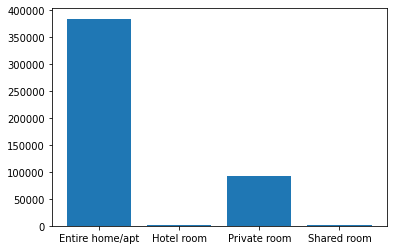

In [23]:
x, y = xy_grouped(columns=['room_type','number_of_reviews'], group='room_type', calc='sum')
plt.bar(x, y);

### Does the room’s type influence the rating?

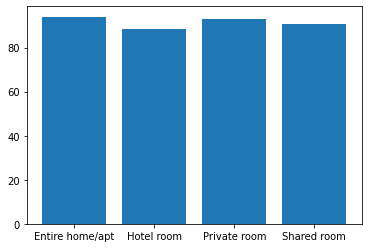

In [24]:
x, y = xy_grouped(columns=['room_type','review_scores_rating'], group='room_type', calc='mean')
plt.bar(x, y);

### Does the room’s type influence the price?

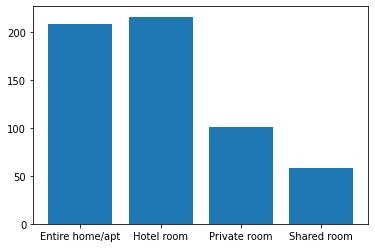

In [25]:
x, y = xy_grouped(columns=['room_type','price'], group='room_type', calc='mean')
plt.bar(x, y);

### Does the price correlate with the users' ratings?

In [26]:
n_bins = 20
df_filtered = df[df['review_scores_rating'] >= 0][['price','review_scores_rating']]
grouped = df_filtered.groupby(pd.cut(df_filtered['review_scores_rating'], bins=n_bins))

x = []
for group in list(grouped.groups.keys()):
    x.append(group.right)

y = []
for val in grouped.mean().values:
    y.append(val[0])

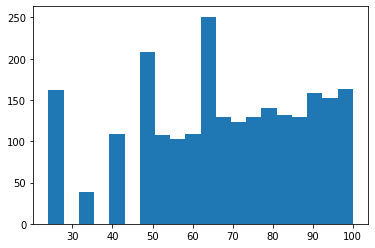

In [27]:
plt.hist(x, bins=n_bins, weights=y);

### What are the variables that influence the price more?

In [28]:
### Separate the input and the output
X = df_ml.drop(['price'], axis=1)
y = df_ml['price']

In [29]:
### Change the float columns to the int type
for col in X.select_dtypes(include=['float']).columns:
    if col != 'reviews_per_month':
        X[col] = X[col].astype('int32')

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item_frame_value(key, value)


In [30]:
### Include columns to the categorical variables
X = pd.get_dummies(X)

In [31]:
### Separate the train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [32]:
### Train the model
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression(normalize=True)

In [33]:
### Predict and score the model
y_test_preds = model.predict(X_test) 
"The r-squared score for the model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model was -5.075248099619673e+27 on 5635 values.'

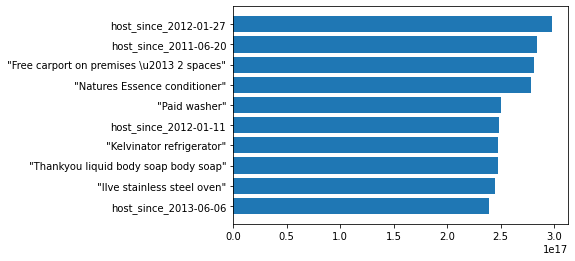

In [34]:
### Plot the variables and the importances
data = {'Features': X.columns, 'Importance': abs(model.coef_)}
df_plot = pd.DataFrame(data)

df_plot.sort_values('Importance', ascending=True, inplace=True)
df_plot = df_plot[-10:]

plt.barh(df_plot['Features'], df_plot['Importance']);

## 5.Evaluate the Results

With the data and charts plotted, we discovered some variables that influence the prices of accommodations in the city of Melbourne.

The most important variables were the room's types and the ratings the places received previously. 

These variables showed that guests have to pay a higher price for more private places and accommodations with higher ratings.

We tried to use a Linear Regression algorithm to better describe the places according to the other data provided, bit without much success.

The R² metric was negative for the experiment, indicating that the algorithm described the data worse than a horizontal line.

Some actions could be done to get a better result on the Linear Regression Algorithm:
- Exclude more columns from the dataset, like the host_since variables. They probably are inserting bias in the algorithm calculations.
- Prepare better the free text values. There are some strange values in the dataset used by the model. The chart plotting the mpst important variables showed some.